In [1]:
from astropy import coordinates as coords
from astropy import units as u 
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
result = SDSS.query_region(co, spectro=True, radius=2*u.arcsec)
spec = SDSS.get_spectra(matches=result)
print(spec)

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9eb9258b80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9eb925a980>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c01480>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c01e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c03a00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c39630>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c3b220>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c60e50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c62a40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f9ef9c94580>]]


In [3]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

FITS_rec([(30.596626, 3.5797, 0.06440803, 0,        0, 1.2189666 , 8.154254 , 36.077015),
          (33.245728, 3.5798, 0.        , 0,        0, 1.2187515 , 7.656426 , 34.99724 ),
          (35.89512 , 3.5799, 0.06292833, 0,        0, 1.2185355 , 7.231167 , 35.379208),
          ...,
          (53.27969 , 3.9635, 0.2728394 , 0,        0, 0.64196426, 4.1553526, 50.13611 ),
          (50.236168, 3.9636, 0.2806295 , 0,        0, 0.64184296, 4.2312737, 50.03317 ),
          (51.702717, 3.9637, 0.18243204, 0, 33554432, 0.64171964, 4.3413963, 50.208874)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [4]:
#co = coords.SkyCoord('178h54m29.81s -00d46m14.20s')
#spec = SDSS.get_spectra(coordinates=co)
#spec[0][1].data

In [5]:
#spec[0][2].data

Text(0, 0.5, 'flux')

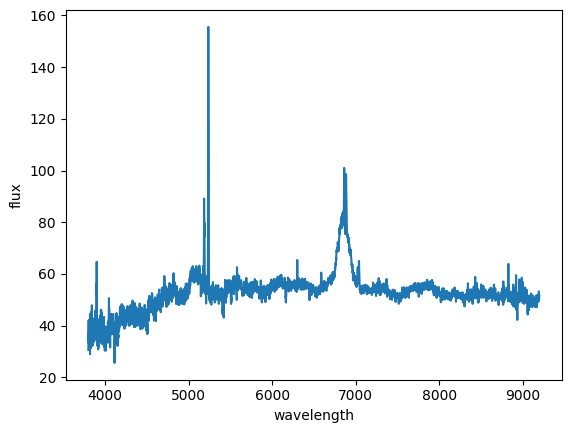

In [6]:
data = spec[0][1].data
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [7]:
from astropy.io import fits
#fits_table_filename = fits.util.get_testdata_filepath('spec-0285-51930-0309.fits')

hdul = fits.open('spec-0285-51930-0309.fits')
#hdul.byteswap().newbyteorder()
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3807 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

Text(0, 0.5, 'flux')

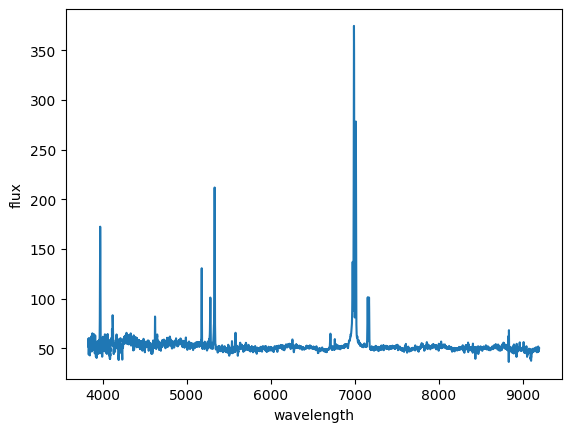

In [8]:
data = hdul[1].data
data.byteswap().newbyteorder()
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [9]:
import pandas as pd
lam = np.array(10**data['loglam'])
data_pd = {'lam': lam, 'flux': data['flux']}
#location = 10**data['loglam']#
pdtable = pd.DataFrame(data_pd)
pdtable.head()

NameError: name 'np' is not defined

In [ ]:
# age_range = df.loc[(df['Age'] >= 30) & (df['Age'] <= 40), 'Age']
noise_range = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#noise_range.index[0]
#noise_range.index[-1]
#noise_range = pdtable[pdtable["lam"] > 7500]
flux_noise = pdtable.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
#pdtable['flux'].loc[noise_range.index[0]]


#noise_range_flux = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#pdtable.iloc[2923:3466]
#print(noise_range)
#data_pd['flux']


In [ ]:
import numpy as np
flux_noise_std = np.std(flux_noise)
print(flux_noise_std)

1.885366


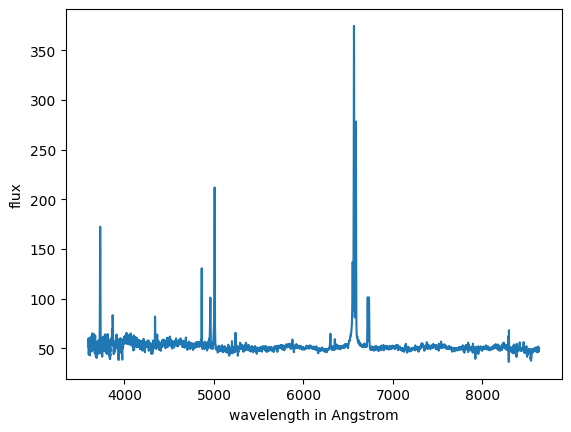

In [ ]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
import pandas as pd 
from astropy import coordinates as coords
from astropy.io import fits

class emission_lines(): 
    
    def __init__(self, filepath, z, snr):
        '''
        filepath (string): filepath to the spectrum data (fits format)
        z (float): redshift of the galaxy 
        snr (float): signal-to-noise ratio desired for emission-line detection threshold
        '''          
        hdul = fits.open(filepath)
        data = hdul[1].data
        data.byteswap().newbyteorder()
        self.lam = np.array(10**data['loglam'])
        self.flux = np.array(data['flux'])
        self.redshift = z
        self.snr = snr

    def line_detection(self): 
        """
        This function will detect peaks by....
        INPUTS:
        variables defined above
        OUTPUTS: 
        1. Pandas dataframe containing the observed and emitted wavelengths of detected emission lines.
        2. Figure showing the spectrum with detected emission-lines indicated by a vertical line.
        """
        #redshift correct the wavelengths to define consistant noise range
        corrected_lam = self.lam/(1+self.redshift)
        # putting the spectrum data into a pandas dataframe
        df = {'obs lam': self.lam, 'emit lam': corrected_lam, 'flux': self.flux}
        pdtable = pd.DataFrame(df)

        #defining a noise range and getting the noise value
        noise_range = pdtable.loc[(pdtable['emit lam'] > 7000) & (pdtable['emit lam'] < 8000), 'emit lam']
        flux_noise = pdtable.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
        flux_noise_std = np.std(flux_noise)

        #line detection 

        #plotting the spectrum with the lines detected
        fig = plt.figure()
        plt.plot(pdtable["emit lam"], pdtable["flux"])
        plt.xlabel("wavelength in Angstrom")
        plt.ylabel("flux")
        return pdtable, fig
    '''
    def line_identification(self, ): 
        #line identification

        return Table
        '''

el = emission_lines('spec-0285-51930-0309.fits', 0.06456, 3)
table, figure = el.line_detection()
#print(table)
plt.show()

In [ ]:
# normalize spectra
flux_noise_std = np.std(flux_noise)
print(flux_noise_std)

1.885366


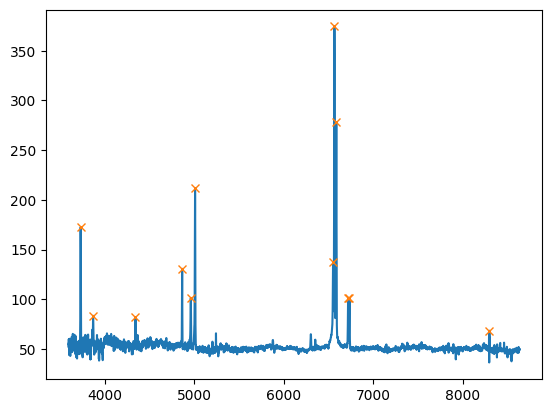

In [ ]:
from scipy.signal import find_peaks
from astropy.table import Table

#convert to astropy table to avoid endian buffer error 
new_table = Table.from_pandas(table) #table from python function 1 output

peaks, props = find_peaks(new_table["flux"], prominence=30) #mess with arguments to get better peak finding, normalize spectra first

plt.plot(new_table["emit lam"], new_table["flux"])
plt.plot(new_table["emit lam"][peaks], new_table["flux"][peaks], 'x')
plt.show()